# Scoping

Problem:

1. No clear idea of why species are endangered

Goals:

1. Species conservation status
1. Patterns or themes on types of species that are endangered

Actions:

1. Will inform NPF on patterns to recognize that are correlated with endangered status

Analysis:

1. Data cleaning, exploration
1. Description of species
1. Grouping of species
1. Correlational analysis

# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [3]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [8]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [10]:
species['conservation_status'] = species['conservation_status'].fillna('No Concern')

In [24]:
species['conservation_status'] = species['conservation_status'].astype('category')

In [32]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern
1,Mammal,Bos bison,"American Bison, Bison",No Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Concern
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Concern
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Concern
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Concern


In [38]:
concerned = species[species['conservation_status'] != 'No Concern']

Text(0, 0.5, 'Number of species')

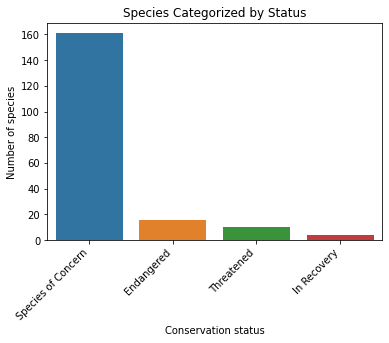

In [39]:
sns.countplot(concerned['conservation_status'], 
              order=['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'])
plt.xticks(horizontalalignment='right', rotation=45)
plt.title("Species Categorized by Status")
plt.xlabel("Conservation status")
plt.ylabel("Number of species")

In [48]:
concerned_observations = concerned.merge(observations, how='left', on='scientific_name')
concerned_observations.describe()

,observations
count,880.000000
mean,116.955682
std,64.932846
min,11.000000
25%,67.000000
50%,104.000000
75%,150.000000
max,268.000000


In [52]:
concerned.groupby(['conservation_status', 'category']).count().sort_values(['conservation_status','scientific_name'])

scientific_name  common_names
conservation_status category                                        
Endangered          Nonvascular Plant                0             0
                    Reptile                          0             0
                    Amphibian                        1             1
                    Vascular Plant                   1             1
                    Fish                             3             3
                    Bird                             4             4
                    Mammal                           7             7
In Recovery         Amphibian                        0             0
                    Fish                             0             0
                    Nonvascular Plant                0             0
                    Reptile                          0             0
                    Vascular Plant                   0             0
                    Mammal                           1             1
                    Bird                             3             3
No Concern          Amphibian                        0             0
                    Bird                             0             0
                    Fish                             0             0
                    Mammal                           0             0
                    Nonvascular Plant                0             0
                    Reptile                          0             0
                    Vascular Plant                   0             0
Species of Concern  Amphibian                        4             4
                    Fish                             4             4
                    Nonvascular Plant                5             5
                    Reptile                          5             5
                    Mammal                          28            28
                    Vascular Plant                  43            43
                    Bird                            72            72
Threatened          Bird                             0             0
                    Nonvascular Plant                0             0
                    Reptile                          0             0
                    Amphibian                        2             2
                    Mammal                           2             2
                    Vascular Plant                   2             2
                    Fish                             4             4

Mammals, Vascular Plants, Birds were the most observed species of concern. 

In [34]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
